In [30]:
import math
import json
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import sys
sys.path.append("../")

from unique_hypercube_size import *

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [136]:
"""

    Set up the parameters
    
"""

num_trials = 20

phase_resolution = 0.1

m_max  = 6
k_max  = 4
ms     = range(1, m_max + 1)
ks     = range(1, k_max + 1)
scales = np.sqrt(np.exp(1))**np.arange(m_max)
# scales = 1. + np.random.sample(m)


print scales

[  1.           1.64872127   2.71828183   4.48168907   7.3890561
  12.18249396]


In [ ]:
"""

    Run the experiments and 
    collect the data
    
"""

load_ratio = np.zeros((m_max, k_max, num_trials))
width = np.zeros((m_max, k_max, num_trials))

for t in xrange(num_trials):
    A, results = doRandomModuleExperiment(ms, ks, scales, phase_resolution)
    
    for (m,k), r in results.iteritems():
        width[m-1,k-1, t] = r
    
    for m in ms:
        for k in ks:
            if 2*m >= k:
                Q, R   = np.linalg.qr(A[:m,:,:k].reshape((2*m,k)))
                v = np.absolute(np.linalg.det(R))
                u = phase_resolution**(2*m - k)
                load_ratio[m-1,k-1,t] = v * u

    

        




In [ ]:
"""

    Compute the volumes 
    from data
    
"""


vol = np.zeros((m_max, k_max, num_trials))
mean_width = np.zeros((m_max, k_max))
mean_vol = np.zeros((m_max, k_max))

mean_ratio = np.zeros((m_max, k_max))

for m in range(m_max):
    for k in range(k_max):
        vol[m,k] = width[m,k]**(k+1)
        mean_width[m,k] = np.mean(width[m,k])
        mean_vol[m,k] = np.mean(vol[m,k])
        mean_ratio[m,k] = np.mean(load_ratio[m,k])

        

In [ ]:
"""
    
    Compute the volumes for the 
    modules-per-axis strategy
    
"""

inferred_vol = np.zeros((m_max,k_max))

for m in ms:
    m_ = m - 1
    for k in ks:
        k_  = k - 1
        mx  = float(m)/float(k)
        m0 = 2
        m1 = 3
        r0 = mean_width[m0, 0]
        r1 = mean_width[m1, 0]

        offset = m0 + 1.
        slope  = (np.log10(r1) - np.log10(r0))/(float(m1)-float(m0))
        base   = np.log10(r0)
        
        rx = 10**(base + (mx - offset)*slope)
        vx = rx**k
        inferred_vol[m_,k_] = vx




In [64]:
"""
    
    Save the data
    
"""

import datetime
timestamp = datetime.datetime.fromtimestamp(time.time()).strftime('%Y-%m-%d_%H:%M:%S')


exp_folder = "../results"
exp_tag    = "m{}_k{}_t{}___{}".format(m_max, k_max, num_trials, timestamp)

filename = "{}/data_dict_{}.p".format(exp_folder, exp_tag)

print filename

with open(filename,'wb') as f:
    pickle.dump({
        "width": width,
        "vol": vol,
        "inferred_vol": inferred_vol,
        "mean_width": mean_width,
        "mean_vol": mean_vol,
        "load_ratio": load_ratio,
        "mean_ratio": mean_ratio,
    }, f)

../results/data_dict_m6_k4_t50___2018-08-13_15:23:21.p


# Create Graphs

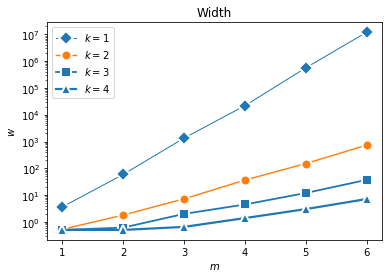

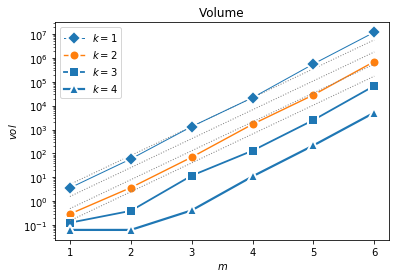

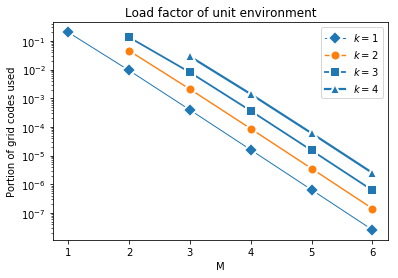

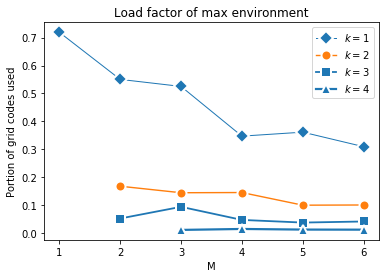

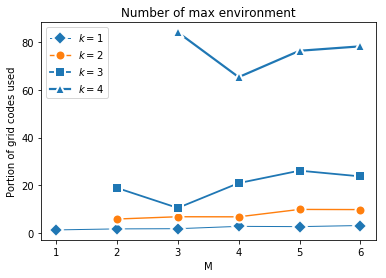

In [133]:
marker = ["X", "P", "^", "s", "o", "D"][::-1]

plt.title("Width")
plt.yscale("log")
plt.xticks(ms)
plt.xlabel("$m$")
plt.ylabel("$w$")
for i in range(k_max):
    c = "C1" if i+1 ==2 else "C0"
    plt.plot(ms, mean_width[:, i], 
             marker=marker[i], 
             c=c, 
             markeredgewidth=2,
             markersize=10,
             linewidth=1 + (i)*0.4,
             markeredgecolor="white",
             label="$k={}$".format(i+1))
plt.legend()
plt.show()


plt.title("Volume")
plt.yscale("log")
plt.xticks(ms)
plt.xlabel("$m$")
plt.ylabel("$vol$")
for i in range(k_max):
    plt.plot(ms, inferred_vol[:, i], 
             c="gray", 
             markeredgewidth=2,
             markersize=10,
             linestyle=":",
             linewidth=1,
             markeredgecolor="white") 
    
    
    c = "C1" if i+1 ==2 else "C0"
    plt.plot(ms, mean_vol[:, i], 
             marker=marker[i], 
             c=c, 
             markeredgewidth=2,
             markersize=10,
             linewidth=1 + (i)*0.4,
             markeredgecolor="white",
             label="$k={}$".format(i+1))
    
plt.legend()
plt.show()




plt.yscale("log")
plt.title("Load factor of unit environment")
for i in range(k_max):
    c = "C1" if i+1 ==2 else "C0"
    
    valid = 2*np.arange(1,m_max+1) > i+1
    plt.plot(np.arange(1,m_max+1)[valid], mean_ratio[:,i][valid], 
            marker=marker[i], 
             c=c, 
             markeredgewidth=2,
             markersize=10,
             linewidth=1 + (i)*0.4,
             markeredgecolor="white",
             label="$k={}$".format(i+1))
plt.legend()
plt.xlabel("M")
plt.ylabel("Portion of grid codes used")
plt.show()





# plt.yscale("log")
plt.title("Load factor of max environment")
for i in range(k_max):
    c = "C1" if i+1 ==2 else "C0"
    valid = 2*np.arange(1,m_max+1) > i+1
    plt.plot(np.arange(1,m_max+1)[valid], mean_ratio[:,i][valid]*mean_vol[:, i][valid], 
            marker=marker[i], 
             c=c, 
             markeredgewidth=2,
             markersize=10,
             linewidth=1 + (i)*0.4,
             markeredgecolor="white",
             label="$k={}$".format(i+1))
plt.legend()
plt.xlabel("M")
plt.ylabel("Portion of grid codes used")
plt.show()


# plt.yscale("log")
plt.title("Number of max environment")
for i in range(k_max):
    c = "C1" if i+1 ==2 else "C0"
    valid = 2*np.arange(1,m_max+1) > i+1
    plt.plot(np.arange(1,m_max+1)[valid], 1./(  mean_ratio[:,i][valid]*mean_vol[:, i][valid] ), 
            marker=marker[i], 
             c=c, 
             markeredgewidth=2,
             markersize=10,
             linewidth=1 + (i)*0.4,
             markeredgecolor="white",
             label="$k={}$".format(i+1))
plt.legend()
plt.xlabel("M")
plt.ylabel("Portion of grid codes used")
plt.show()




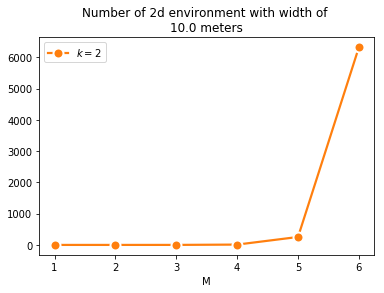

In [135]:

w = 100./3.

k=2

# plt.yscale("log")
plt.title("Number of {}d environment with width of \n{} meters".format(k, w*0.3))


plt.plot(np.arange(1,m_max+1), 1./(  mean_ratio[:,k-1]*(w**k) ), 
            marker=marker[k-1], 
             c="C1", 
             markeredgewidth=2,
             markersize=10,
             linewidth=1 + (i)*0.4,
             markeredgecolor="white",
             label="$k={}$".format(k))
plt.legend()
plt.xlabel("M")
plt.show()

